# 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer

from scipy import stats
from scipy.stats import skew
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
#deleting the following columns
del df['Unnamed: 0'] #no useful data
del df['EASE-MENT'] #empty column

# 2. Cleaning Data

In [5]:
#removing duplicate data entries
df.drop_duplicates(keep = 'last')

#replacing '-' and ' ' with NaN
df.replace(' -  ', np.nan, inplace = True)
df.replace(' ', np.nan, inplace = True)

# 3. Data Inspection

In [6]:
# getting a description of every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            83810 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       83810 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                19052 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

In [7]:
del df['APARTMENT NUMBER']

In [8]:
df['TAX CLASS AT TIME OF SALE'] = pd.to_numeric(df['TAX CLASS AT TIME OF SALE'], errors='coerce')
df['TAX CLASS AT PRESENT'] = pd.to_numeric(df['TAX CLASS AT PRESENT'], errors='coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')
df['BOROUGH'] = pd.to_numeric(df['BOROUGH'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   TAX CLASS AT PRESENT            75696 non-null  float64       
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83810 non-null  object        
 7   ADDRESS                         84548 non-null  object        
 8   ZIP CODE                        84548 non-null  int64         
 9   RESIDENTIAL UNITS               84548 non-null  int64         
 10  COMMERCIAL UNITS                84548 non-null  int64         
 11  TO

In [9]:
#count of missing values in each column
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT               8852
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [10]:
'''#impute missing values in LAND SQAURE FEET and GROSS SQUARE FEET with representation
cols_with_missing_vals = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']

#make a copy to prevent changing original data
df_copy = df.copy()

#make new columns indicating what will be imputed
for col in cols_with_missing_vals:
    df_copy[col + '_was_missing'] = df_copy[col].isnull()

#impute values
my_imputer = SimpleImputer()
imputed_df = pd.DataFrame(my_imputer.fit_transform(df_copy))

#adding back columns removed in imputing
imputed_df.columns = df_copy.columns'''

"#impute missing values in LAND SQAURE FEET and GROSS SQUARE FEET with representation\ncols_with_missing_vals = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']\n\n#make a copy to prevent changing original data\ndf_copy = df.copy()\n\n#make new columns indicating what will be imputed\nfor col in cols_with_missing_vals:\n    df_copy[col + '_was_missing'] = df_copy[col].isnull()\n\n#impute values\nmy_imputer = SimpleImputer()\nimputed_df = pd.DataFrame(my_imputer.fit_transform(df_copy))\n\n#adding back columns removed in imputing\nimputed_df.columns = df_copy.columns"

##Inspecting Numerical Data

In [11]:
df.describe(include = np.number)

,BOROUGH,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,75696.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,84548.000000,84548.000000,6.998700e+04
mean,2.998758,1.651910,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.657485,1.276456e+06
std,1.289790,0.844821,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,537.344993,0.819341,1.140526e+07
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2.000000,1.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,1920.000000,1.000000,2.250000e+05
50%,3.000000,1.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1940.000000,2.000000,5.300000e+05
75%,4.000000,2.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,1965.000000,2.000000,9.500000e+05
max,5.000000,4.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


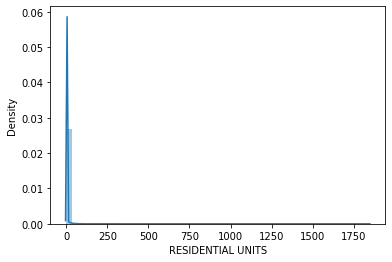

In [12]:
sns.distplot(df['RESIDENTIAL UNITS'])

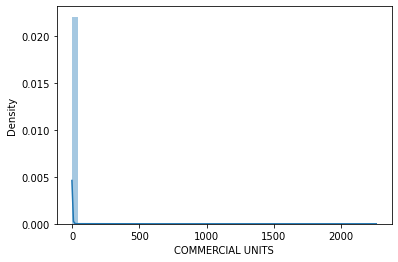

In [13]:
sns.distplot(df['COMMERCIAL UNITS'])

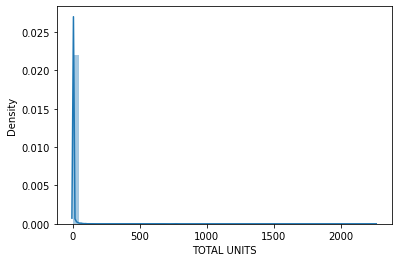

In [14]:
sns.distplot(df['TOTAL UNITS'])

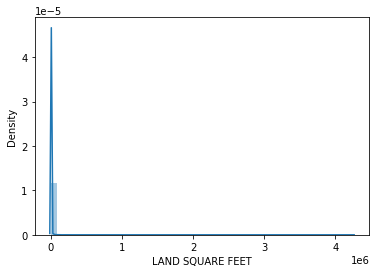

In [15]:
sns.distplot(df['LAND SQUARE FEET'])

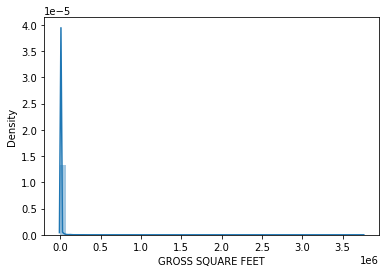

In [16]:
sns.distplot(df['GROSS SQUARE FEET'])

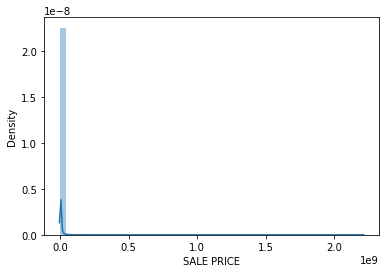

In [17]:
sns.distplot(df['SALE PRICE'])

From the plots above, outliers are skewing the distributuion of the data. This process of handling outliers will be done effectively in the preprocessing section of this exploration

#Inspecting Categorical Data

In [18]:
df.select_dtypes(exclude=np.number)

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,ADDRESS,BUILDING CLASS AT TIME OF SALE,SALE DATE
0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,153 AVENUE B,C2,2017-07-19
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C7,234 EAST 4TH STREET,C7,2016-12-14
2,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C7,197 EAST 3RD STREET,C7,2016-12-09
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C4,154 EAST 7TH STREET,C4,2016-09-23
4,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,301 EAST 10TH STREET,C2,2016-11-17
...,...,...,...,...,...,...
84543,WOODROW,02 TWO FAMILY DWELLINGS,B9,37 QUAIL LANE,B9,2016-11-28
84544,WOODROW,02 TWO FAMILY DWELLINGS,B9,32 PHEASANT LANE,B9,2017-04-21
84545,WOODROW,02 TWO FAMILY DWELLINGS,B2,49 PITNEY AVENUE,B2,2017-07-05
84546,WOODROW,22 STORE BUILDINGS,K6,2730 ARTHUR KILL ROAD,K6,2016-12-21


In [19]:
df.select_dtypes(exclude=np.number).nunique()

NEIGHBORHOOD                        254
BUILDING CLASS CATEGORY              47
BUILDING CLASS AT PRESENT           166
ADDRESS                           67563
BUILDING CLASS AT TIME OF SALE      166
SALE DATE                           364
dtype: int64

Based on the number of unique values in the ordinal data columns, it is sensible to one-hot encode the 'BOROUGH' variable, but not reasonable to one-hot encode the 'NEIGHBORHOOD' column. However, label encoding variables such as 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE' could be a reasonable approach

In [20]:
(df['BUILDING CLASS AT PRESENT'] == df['BUILDING CLASS AT TIME OF SALE']).value_counts()

True     83588
False      960
dtype: int64

In [21]:
del df['BUILDING CLASS AT TIME OF SALE']

Dropping 'BUILDING CLASS AT TIME OF SALE' as high correlation with 'BUILDING CLASS AT PRESENT' representing collinearity

#Exploring Correlations

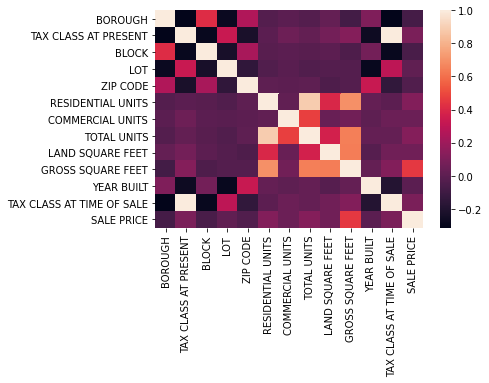

In [22]:
corr = df.corr()
sns.heatmap(corr)

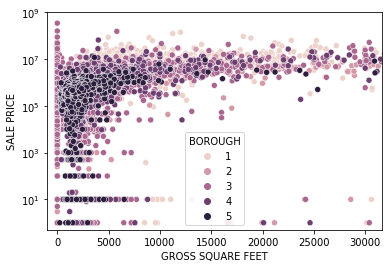

In [23]:
fig, ax = plt.subplots()
sns.scatterplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=df, hue='BOROUGH')
ax.set_xlim([-10**3, 10**4.5])
ax.set_ylim([.5, 10**9])
ax.set_yscale("log")
plt.show()

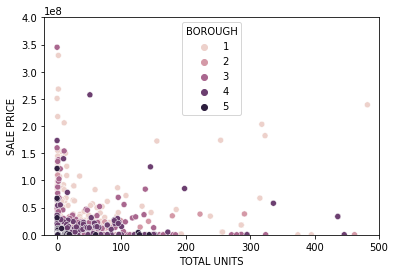

In [24]:
fig, ax = plt.subplots()
sns.scatterplot(x='TOTAL UNITS', y='SALE PRICE', data=df, hue='BOROUGH')
ax.set_xlim([-20, 500])
ax.set_ylim([-1000, 0.4*(10**9)])
ax.set_yscale("linear")
plt.show()

### Exploring Sale Price


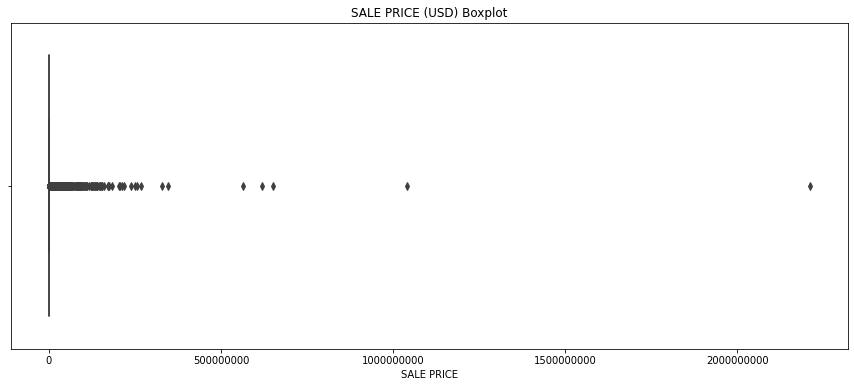

In [25]:
plt.figure(figsize=(15,6))
sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('SALE PRICE (USD) Boxplot')
plt.show()

In [26]:
df = df[(df['SALE PRICE'] > 1000) & (df['SALE PRICE'] < 5000000)] #removing outliers
df.shape

(56235, 18)

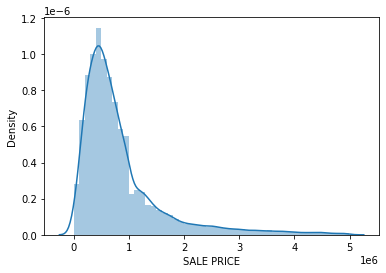

In [27]:
sns.distplot(df['SALE PRICE'])

In [28]:
df['SALE PRICE'].skew()
#heavily skewed right

2.3270421689614933

### Exploring Gross & Land Square Feet

Text(0.5, 1.0, 'GROSS SQUARE FEET Boxplot')

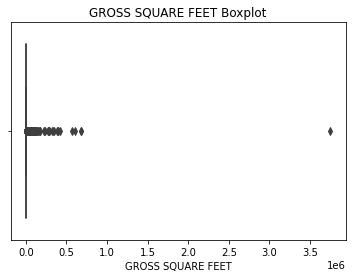

In [29]:
sns.boxplot(x='GROSS SQUARE FEET', data=df)
plt.title('GROSS SQUARE FEET Boxplot')

Text(0.5, 1.0, 'LAND SQUARE FEET Boxplot')

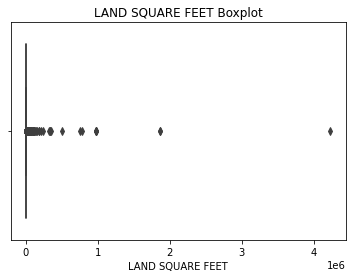

In [30]:
sns.boxplot(x='LAND SQUARE FEET', data=df)
plt.title('LAND SQUARE FEET Boxplot')

In [31]:
df = df[df['GROSS SQUARE FEET'] < 12500]
df = df[df['LAND SQUARE FEET'] < 20000]

Text(0.5, 1.0, 'GROSS SQUARE FEET Scatterplot')

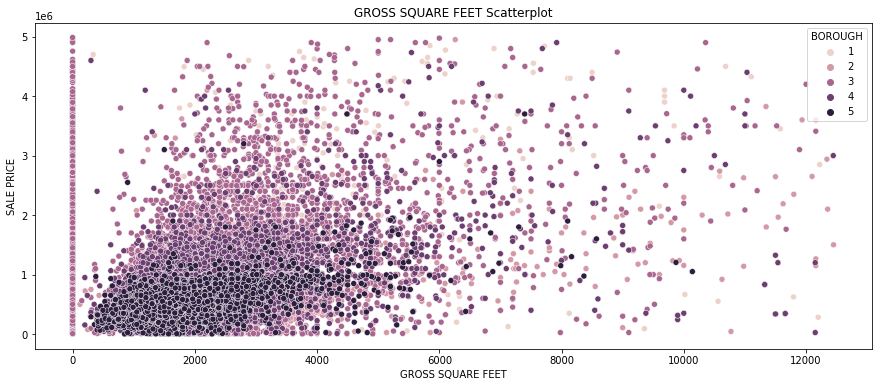

In [32]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=df, hue='BOROUGH')
plt.title('GROSS SQUARE FEET Scatterplot')

Text(0.5, 1.0, 'LAND SQUARE FEET Scatterplot')

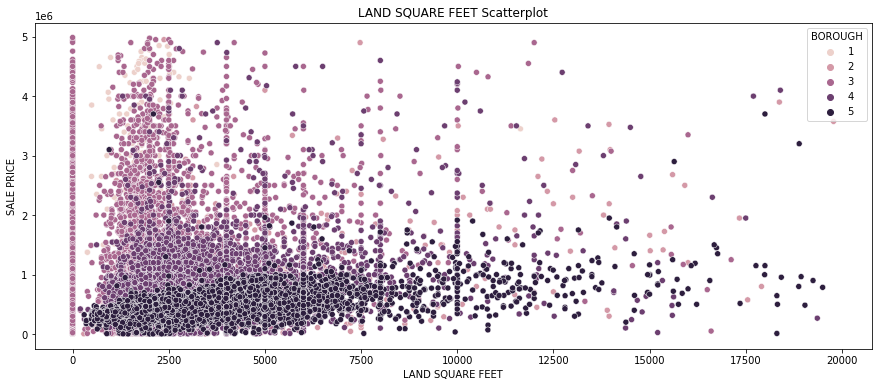

In [33]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df, hue='BOROUGH')
plt.title('LAND SQUARE FEET Scatterplot')

### Exploring Residential, Commercial, and Total Units

Text(0.5, 1.0, 'TOTAL UNITS Scatterplot')

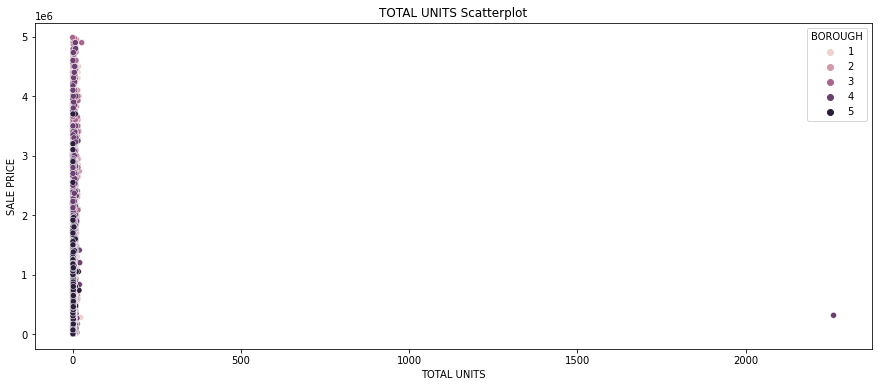

In [34]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='TOTAL UNITS', y='SALE PRICE', data=df, hue='BOROUGH')
plt.title('TOTAL UNITS Scatterplot')

In [35]:
df = df[df['TOTAL UNITS'] > 0] 
df = df[df['TOTAL UNITS'] < 500]

Text(0.5, 1.0, 'SALE PRICE by TOTAL UNITS')

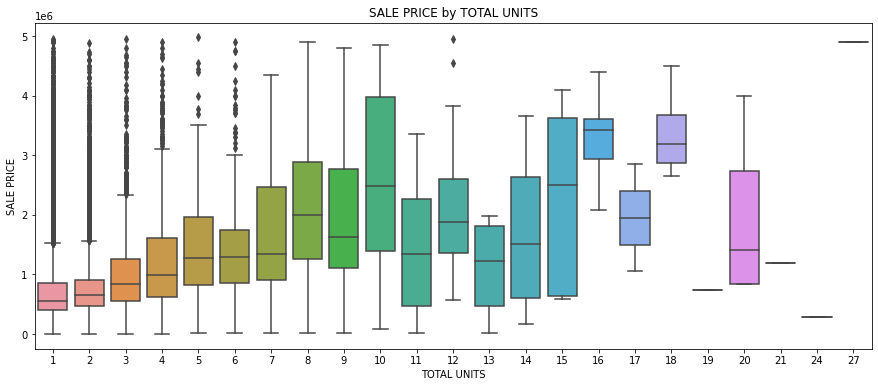

In [36]:
plt.figure(figsize=(15,6))
sns.boxplot(x='TOTAL UNITS', y='SALE PRICE', data=df)
plt.title('SALE PRICE by TOTAL UNITS')

Text(0.5, 1.0, 'SALE PRICE by COMMERCIAL UNITS')

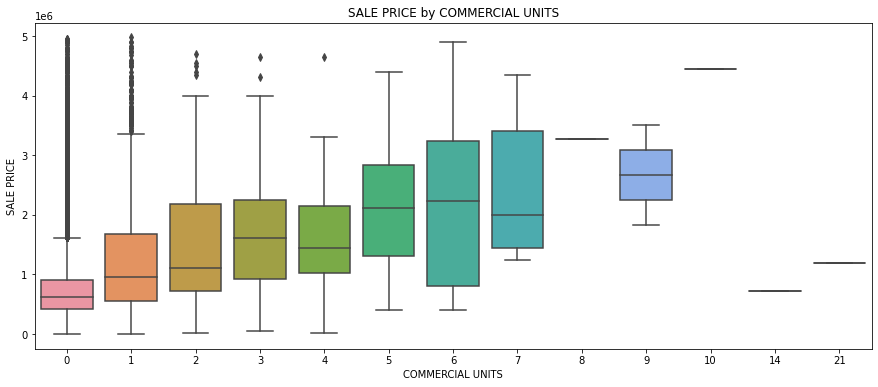

In [37]:
plt.figure(figsize=(15,6))
sns.boxplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=df)
plt.title('SALE PRICE by COMMERCIAL UNITS')

Text(0.5, 1.0, 'SALE PRICE by RESIDENTIAL UNITS')

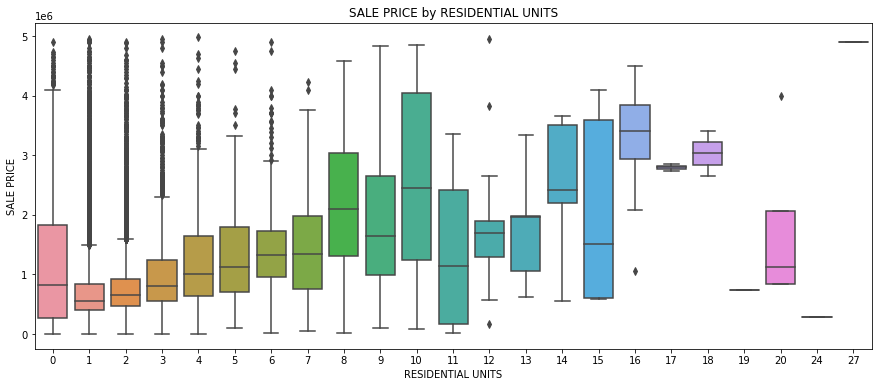

In [38]:
plt.figure(figsize=(15,6))
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=df)
plt.title('SALE PRICE by RESIDENTIAL UNITS')

### Exploring Categorical Variables

In [39]:
cat_df = df.select_dtypes(exclude=[np.number])
cat_df.describe()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,ADDRESS,SALE DATE
count,31436,31436,31436,31436,31436
unique,237,38,108,28197,327
top,BEDFORD STUYVESANT,01 ONE FAMILY DWELLINGS,A1,429 KENT AVENUE,2017-02-28 00:00:00
freq,802,12530,4707,156,209
first,NaN,NaN,NaN,NaN,2016-09-01 00:00:00
last,NaN,NaN,NaN,NaN,2017-08-31 00:00:00


#### Borough & Neighbourhood

In [40]:
pivot_neighbourhood = df.pivot_table(index = ['BOROUGH', 'NEIGHBORHOOD'], values = 'SALE PRICE', aggfunc=np.mean)
pivot_neighbourhood

SALE PRICE
BOROUGH NEIGHBORHOOD                   
1       ALPHABET CITY      3.775822e+06
        CHELSEA            1.783000e+06
        CHINATOWN          3.350000e+06
        CLINTON            3.900000e+06
        EAST VILLAGE       3.850000e+06
...                                 ...
5       TRAVIS             4.121130e+05
        WEST NEW BRIGHTON  4.439520e+05
        WESTERLEIGH        5.462746e+05
        WILLOWBROOK        6.283109e+05
        WOODROW            5.512657e+05

[238 rows x 1 columns]

In [41]:
pivot_borough = df.pivot_table(index = ['BOROUGH'], values = 'SALE PRICE', aggfunc=np.mean)
pivot_borough

,SALE PRICE
BOROUGH,
1,2.342890e+06
2,5.055042e+05
3,1.044612e+06
4,7.096769e+05
5,5.171434e+05


#### Building Class Category

In [42]:
pivot_build_cat = df.pivot_table(index = ['BUILDING CLASS CATEGORY'], values = 'SALE PRICE', aggfunc=np.mean)
pivot_build_cat

,SALE PRICE
BUILDING CLASS CATEGORY,
01 ONE FAMILY DWELLINGS,6.147377e+05
02 TWO FAMILY DWELLINGS,7.625013e+05
03 THREE FAMILY DWELLINGS,9.501954e+05
04 TAX CLASS 1 CONDOS,6.881789e+05
05 TAX CLASS 1 VACANT LAND,1.276861e+06
06 TAX CLASS 1 - OTHER,5.384830e+05
07 RENTALS - WALKUP APARTMENTS,1.467636e+06
08 RENTALS - ELEVATOR APARTMENTS,3.869286e+06
09 COOPS - WALKUP APARTMENTS,1.860000e+05


In [43]:
pivot_build_cat_pres = df.pivot_table(index = ['BUILDING CLASS AT PRESENT'], values = 'SALE PRICE', aggfunc=np.mean)
pivot_build_cat_pres

,SALE PRICE
BUILDING CLASS AT PRESENT,
A0,6.592321e+05
A1,6.283012e+05
A2,5.571801e+05
A3,1.400350e+06
A4,1.976645e+06
...,...
W4,2.200000e+06
W8,9.750000e+05
W9,6.870000e+05


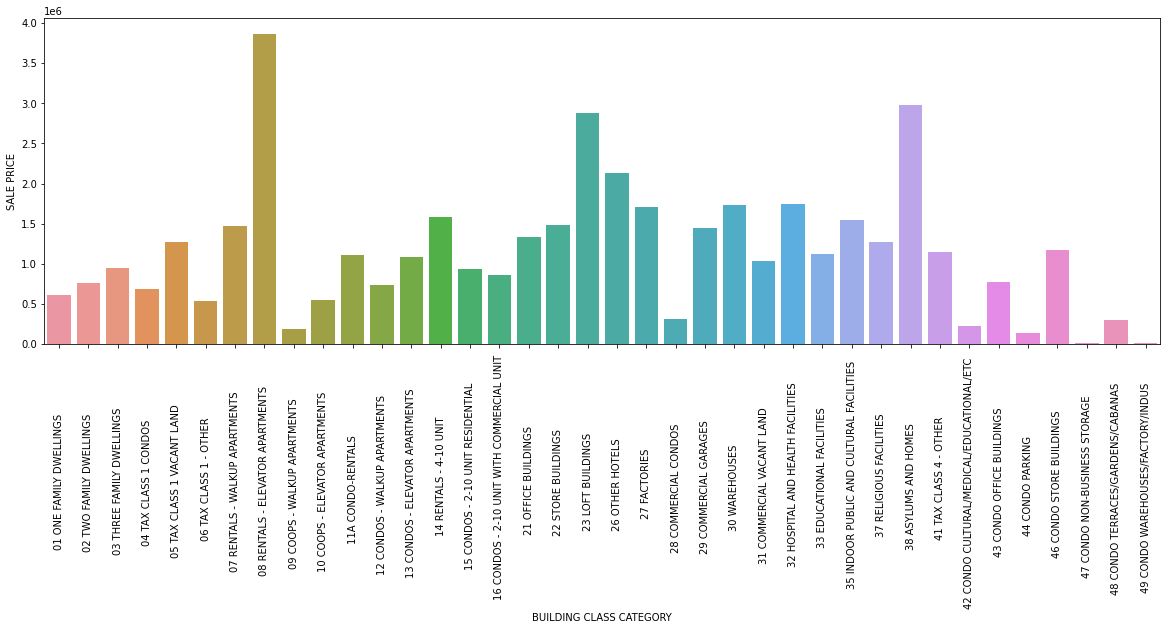

In [44]:
plt.figure(figsize=(20,6))
plt.xticks(rotation='vertical')
sns.barplot(x=pivot_build_cat.index, y='SALE PRICE', data = pivot_build_cat)

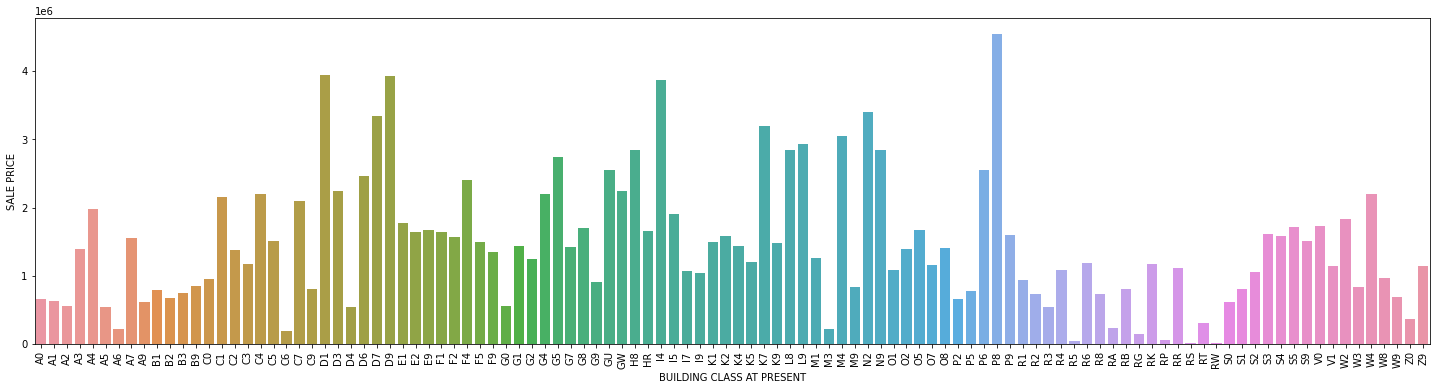

In [45]:
plt.figure(figsize=(25,6))
plt.xticks(rotation='vertical')
sns.barplot(x=pivot_build_cat_pres.index, y='SALE PRICE', data = pivot_build_cat_pres)

#### Tax Class

In [46]:
pivot_tax_pres = df.pivot_table(index = ['TAX CLASS AT PRESENT'], values = 'SALE PRICE', aggfunc=np.mean)
pivot_tax_pres

,SALE PRICE
TAX CLASS AT PRESENT,
1.0,7.049976e+05
2.0,1.071494e+06
4.0,1.220052e+06


In [47]:
pivot_tax_sale = df.pivot_table(index = ['TAX CLASS AT TIME OF SALE'], values = 'SALE PRICE', aggfunc=np.mean)
pivot_tax_sale

,SALE PRICE
TAX CLASS AT TIME OF SALE,
1,7.049065e+05
2,1.164215e+06
4,1.215165e+06


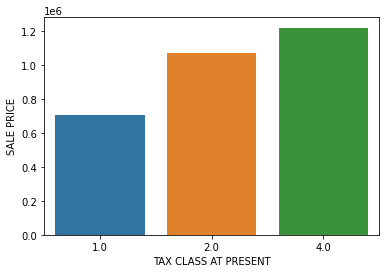

In [48]:
sns.barplot(x=pivot_tax_pres.index, y='SALE PRICE', data = pivot_tax_pres)

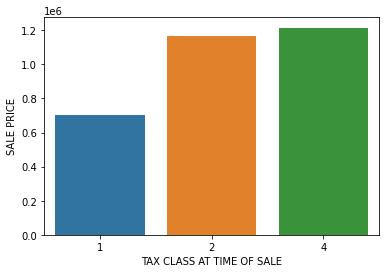

In [49]:
sns.barplot(x=pivot_tax_sale.index, y='SALE PRICE', data = pivot_tax_sale)

#### Sale Date

In [50]:
pivot_date = df.pivot_table(index = ['SALE DATE'], values = 'SALE PRICE', aggfunc=np.mean)
pivot_date

,SALE PRICE
SALE DATE,
2016-09-01,755447.792593
2016-09-02,683894.287500
2016-09-05,875000.000000
2016-09-06,916776.776596
2016-09-07,769341.704225
...,...
2017-08-26,226726.000000
2017-08-28,831366.482143
2017-08-29,965158.481481


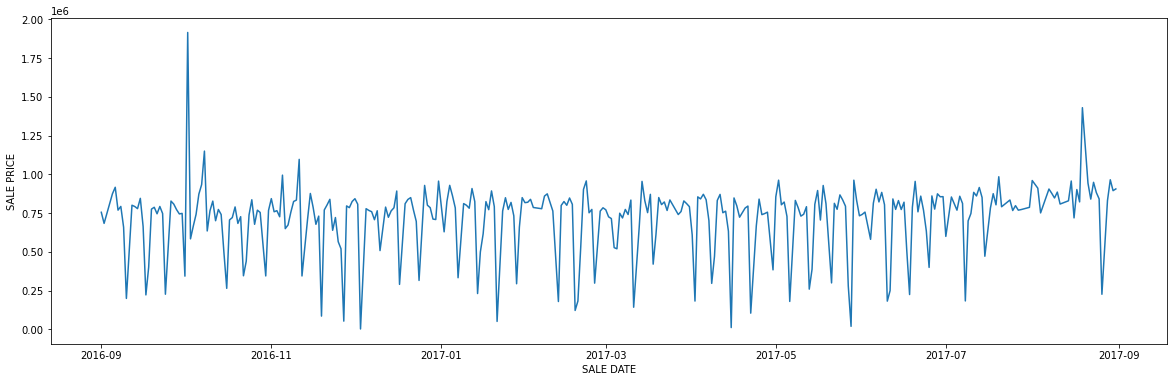

In [51]:
plt.figure(figsize=(20,6))
sns.lineplot(x=pivot_date.index, y='SALE PRICE', data = pivot_date)

# Modelling


In [52]:
#normalise numerical variables
#one-hot encoding for the categorical variables

In [53]:
del df['ADDRESS']
del df['SALE DATE']

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31436 entries, 3 to 84547
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BOROUGH                    31436 non-null  int64  
 1   NEIGHBORHOOD               31436 non-null  object 
 2   BUILDING CLASS CATEGORY    31436 non-null  object 
 3   TAX CLASS AT PRESENT       28625 non-null  float64
 4   BLOCK                      31436 non-null  int64  
 5   LOT                        31436 non-null  int64  
 6   BUILDING CLASS AT PRESENT  31436 non-null  object 
 7   ZIP CODE                   31436 non-null  int64  
 8   RESIDENTIAL UNITS          31436 non-null  int64  
 9   COMMERCIAL UNITS           31436 non-null  int64  
 10  TOTAL UNITS                31436 non-null  int64  
 11  LAND SQUARE FEET           31436 non-null  float64
 12  GROSS SQUARE FEET          31436 non-null  float64
 13  YEAR BUILT                 31436 non-null  int

In [55]:
num_data = df.select_dtypes(include=[np.number])
num_data.columns

Index(['BOROUGH', 'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'SALE PRICE'],
      dtype='object')

##Log Transforming and Scaling the Data

In [56]:
#determine which features are skewed
skewed_ft = df[num_data.columns].apply(lambda x: skew(x.dropna().astype(float))) #skew value of numerical features
skewed_ft = skewed_ft[skewed_ft > 0.75] #threshold skew value of 0.75 for moderate to highly skewed features
skewed_ft = skewed_ft.index

In [57]:
df[skewed_ft] = np.log1p(df[skewed_ft]) #log(x+1) transform (normalizes features and accounts for zeros)

In [58]:
#scaling features
scaler = StandardScaler()
scaled_ft = scaler.fit_transform(df[num_data.columns])

In [59]:
#replacing df numerical column data with scaled data
for i, col in enumerate(num_data.columns):
       df[col] = scaled_ft[:,i]

## One-Hot Encoding Categorical Variables

In [60]:
cat_features = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'BUILDING CLASS AT PRESENT', 'TAX CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE']

In [61]:
one_hot_enc = pd.get_dummies(df[cat_features])
one_hot_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31436 entries, 3 to 84547
Columns: 386 entries, BOROUGH to BUILDING CLASS AT PRESENT_Z9
dtypes: float64(3), uint8(383)
memory usage: 13.7 MB


In [62]:
fin_df = df.drop(cat_features, axis=1)
fin_df = pd.concat([fin_df, one_hot_enc], axis=1)

## Train/Test Split

In [63]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31436 entries, 3 to 84547
Columns: 396 entries, BLOCK to BUILDING CLASS AT PRESENT_Z9
dtypes: float64(13), uint8(383)
memory usage: 16.1 MB


In [64]:
fin_df.replace([np.inf, -np.inf], np.nan, inplace=True)
fin_df = fin_df.dropna()
Y_df = fin_df['SALE PRICE']
X_df = fin_df.drop('SALE PRICE', axis=1)

X_df.shape , Y_df.shape
#X_df.replace([np.inf, -np.inf], np.nan, inplace=True)
#Y_df.replace([np.inf, -np.inf], np.nan, inplace=True)
#X_df = X_df.dropna()
#Y_df.dropna()

((28625, 395), (28625,))

In [65]:
X_train ,X_test, Y_train , Y_test = train_test_split(X_df , Y_df , test_size = 0.2 , random_state =42)

In [67]:
X_train.shape , Y_train.shape

((22900, 395), (22900,))

In [68]:
X_test.shape , Y_test.shape

((5725, 395), (5725,))

In [69]:
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

##1. Linear Regression


In [70]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
Y_pred_lr = lin_reg.predict(X_test)
rmse(Y_test, Y_pred_lr)

151598878.498696

In [71]:
print('R2: ', r2_score(Y_test, Y_pred_lr)) #why is RMSE so high and r2 negative?

R2:  -2.2027150232103812e+16



##2. Ridge Regression


In [72]:
ridge_reg = RidgeCV(alphas = np.logspace(-3,1,50))
ridge_reg.fit(X_train, Y_train)
Y_pred_ridge = ridge_reg.predict(X_test)
rmse(Y_test, Y_pred_ridge)

0.7735197976923869

In [73]:
print('Alpha: ', ridge_reg.alpha_)
print('R2: ', r2_score(Y_test, Y_pred_ridge))

Alpha:  2.2229964825261934
R2:  0.4265319798723134


##3. Lasso Regression

In [74]:
lasso_reg = LassoCV(alphas = np.logspace(-3,1,50))
lasso_reg.fit(X_train, Y_train)
Y_pred_lasso = lasso_reg.predict(X_test)
rmse(Y_test, Y_pred_lasso)

0.8120733706084325

In [75]:
print('Alpha: ', lasso_reg.alpha_)
print('R2: ', r2_score(Y_test, Y_pred_lasso))

Alpha:  0.001
R2:  0.36794208282116136


##4. Elastic Net Regression

In [76]:
elastic_reg = ElasticNetCV(l1_ratio = [0.1, 0.5, 0.7, 0.8, 0.9, 0.95, 0.99], alphas = np.logspace(-3,1,50))
elastic_reg.fit(X_train, Y_train)
Y_pred_elastic = elastic_reg.predict(X_test)
rmse(Y_test, Y_pred_elastic)

0.7857260889849211

In [77]:
print('Alpha: ', elastic_reg.alpha_)
print('L1 Ratio: ', elastic_reg.l1_ratio_)
print('R2: ', r2_score(Y_test, Y_pred_elastic))

Alpha:  0.001
L1 Ratio:  0.1
R2:  0.40829030656026855


##5. Random Forest Regression

In [78]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, Y_train)
Y_pred_rf = rf_reg.predict(X_test)
rmse(Y_test, Y_pred_rf)

0.73890999345731

In [79]:
print('R2: ', r2_score(Y_test, Y_pred_rf))

R2:  0.4767015873280829
